In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Health_heart_experimental.csv")

The above line reads .csv file into DF(DATA FRAME)

In [4]:
df.head()


,Unnamed: 0,age,sex,SysBP,DiaBP,HR,weightKg,heightCm,BMI,indication
0,0,64,1,141,96,128,69,147,32.0,1
1,1,21,1,109,100,106,48,150,21.0,0
2,2,30,0,112,73,126,69,183,21.0,0
3,3,35,1,106,90,130,45,149,20.0,0
4,4,39,0,140,90,112,92,166,33.0,1


#LINE

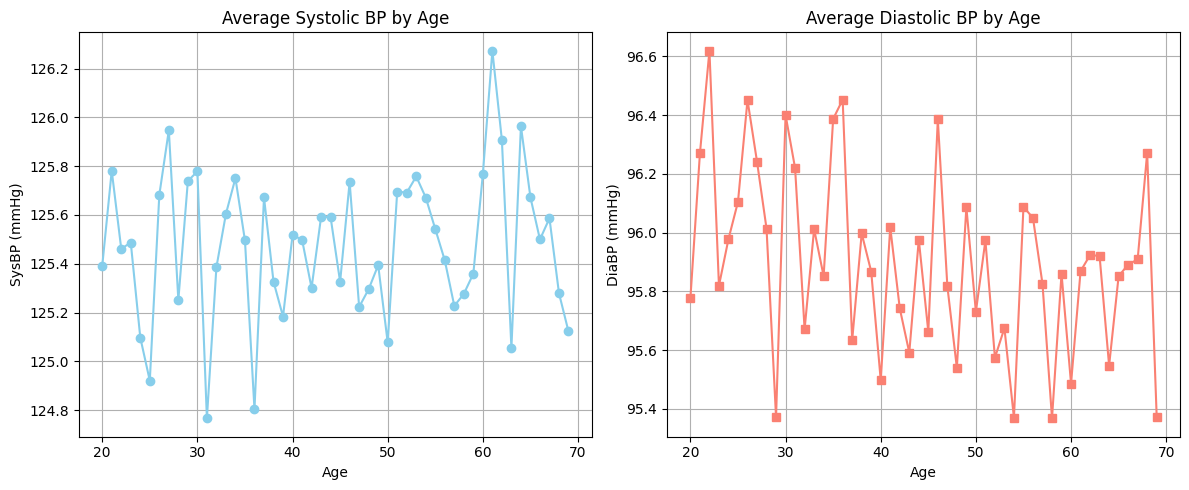

In [3]:
# Group by age and calculate averages
age_bp = df.groupby("age")[["SysBP", "DiaBP"]].mean()

# Create subplots: 1 row, 2 columns (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot SysBP vs Age (left side)
axes[0].plot(age_bp.index, age_bp["SysBP"], color="skyblue", marker="o")
axes[0].set_title("Average Systolic BP by Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("SysBP (mmHg)")
axes[0].grid(True)

# Plot DiaBP vs Age (right side)
axes[1].plot(age_bp.index, age_bp["DiaBP"], color="salmon", marker="s")
axes[1].set_title("Average Diastolic BP by Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("DiaBP (mmHg)")
axes[1].grid(True)

# Adjust layout so titles/labels don’t overlap
plt.tight_layout()
plt.show()


The line graph shows how systolic blood pressure changes with age. Older people generally have higher blood pressure, while younger people have lower values. Although the graph fluctuates, the overall pattern suggests blood pressure rises as age increases.
In contrast, the diastolic blood pressure line remains relatively stable during younger ages, showing little variation. However, as age increases into older groups, diastolic pressure tends to decline, resulting in lower values compared to middle age. This pattern highlights how systolic and diastolic pressures behave differently across the lifespan.




#Bar Graph


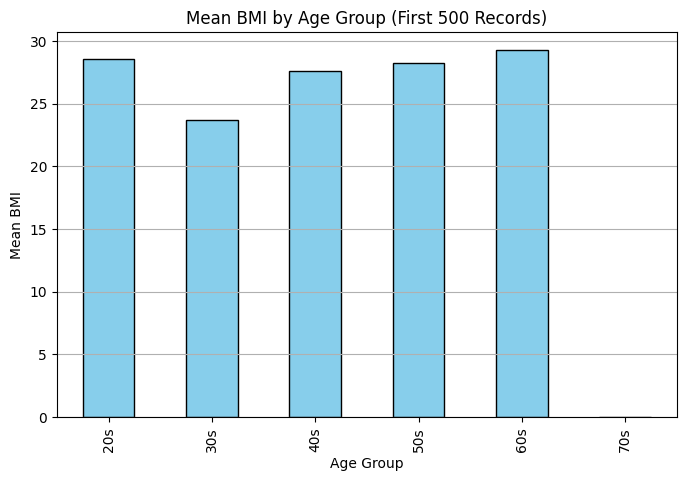

In [34]:

df_first60 = df.head(60).copy()   

df_first60["age_group"] = pd.cut(df_first500["age"], 
                                  bins=range(20, 90, 10),    
                                  labels=[f"{i}s" for i in range(20, 80, 10)])

age_bmi_means = df_first500.groupby("age_group", observed=False)["BMI"].mean()

plt.figure(figsize=(8,5))
age_bmi_means.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Age Group")
plt.ylabel("Mean BMI")
plt.title("Mean BMI by Age Group (First 500 Records)")
plt.grid(axis="y")
plt.show()

The above graph shows how average BMI changes with age. At around age 20, BMI is higher, close to 27. It then decreases gradually until about age 40, which may reflect people being more active and taking better care of themselves during early adulthood. After 40, BMI begins to rise again, likely because many pay less attention to diet, exercise, and overall self-care as they get older. This pattern highlights how changes in personal habits across life stages influence body weight.


#Pie-Chart

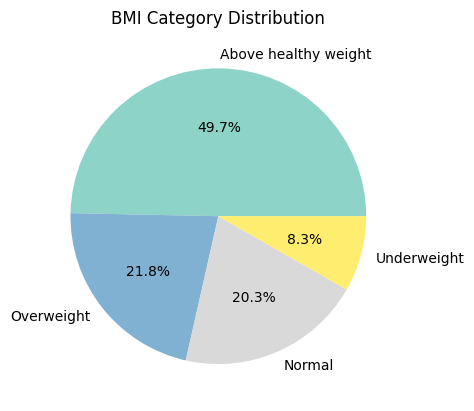

In [7]:



df["BMI_category"] = pd.cut(df["BMI"], bins=[0,18.5,24.9,29.9,100], 
                            labels=["Underweight","Normal","Overweight","Above healthy weight"])

df["BMI_category"].value_counts().plot(kind="pie", autopct="%1.1f%%", colormap="Set3")

plt.title("BMI Category Distribution")
plt.ylabel("")
plt.show()

The chart shows how people are divided into different BMI categories. Nearly half of the group, about 49.7%, fall into the “Above healthy weight” category, suggesting many individuals carry more weight than is considered healthy. Around 21.8% are “Overweight,” while 20.3% are in the “Normal” range, showing a smaller portion with balanced body weight. Only 8.3% are “Underweight,” making it the least common category. Overall, the chart highlights that most individuals in this dataset are above the healthy BMI range, reflecting lifestyle and self-care habits that may influence body weight.

#BOX PLOT

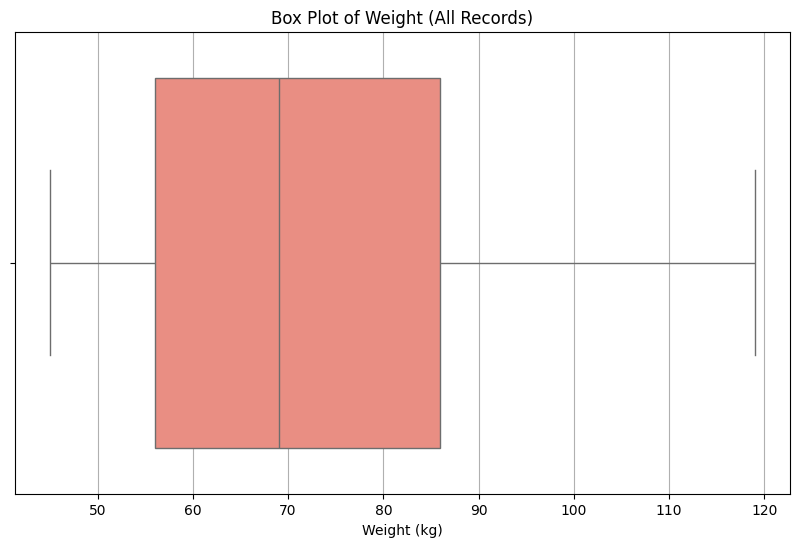

In [8]:

# Create the horizontal boxplot for all weight data
plt.figure(figsize=(10,6))
sns.boxplot(x=df["weightKg"], color="salmon")

plt.title("Box Plot of Weight (All Records)")
plt.xlabel("Weight (kg)")
plt.grid(axis="x")
plt.show()

This graph shows how weight is spread across all the records in the dataset. Most people weigh between about 58 and 88 kg, with the middle point (median) around 70 kg. The shortest and tallest lines show the lowest and highest typical weights, from about 47 to 118 kg. Overall, the chart makes it easy to see the common range of weights and how they vary across the group.

#HISTOGRAM


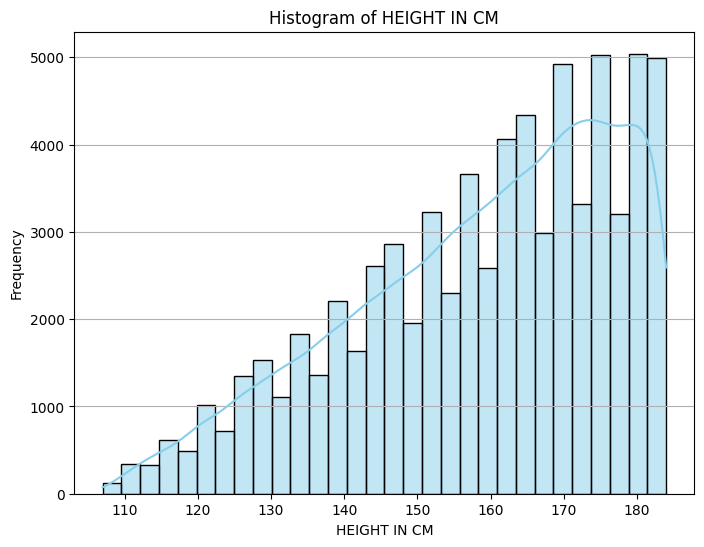

In [10]:

# Example: Histogram of BMI
plt.figure(figsize=(8,6))
sns.histplot(df["heightCm"], bins=30, kde=True, color="skyblue")

plt.title("Histogram of HEIGHT IN CM")
plt.xlabel("HEIGHT IN CM")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

In the above histogram, the X-axis shows the height in cm ranging from 110 to 180 cm, and the Y-axis shows the number of times/frequency of the height occurrence. From the graph, we can interpret that from the data set most people are on the taller side, with an average height of 170–180 cm, and not many people are on the shorter side.

#Scatter plot

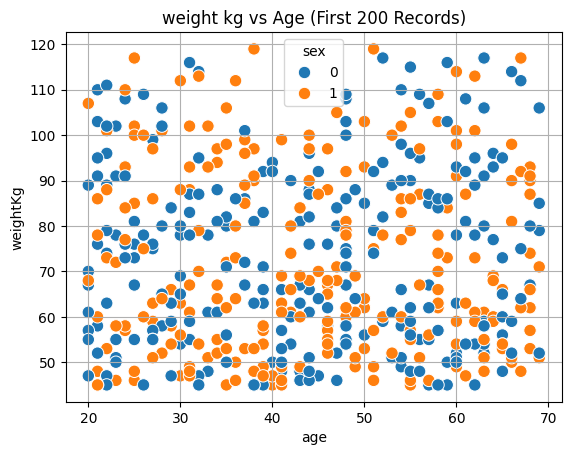

In [48]:

df_small = df.head(500)

sns.scatterplot(x='age', y='weightKg', hue='sex', data=df_small, s=80)
plt.title("weight kg vs Age (First 200 Records)")
plt.grid(True)
plt.show()

The scatterplot shows how weight changes with age for males and females. At most ages, weights vary a lot, so there isn’t a clear trend. Some older groups seem to have slightly higher weights. Comparing the colors, females generally appear to weigh a bit more than males.